In [259]:
import pandas as pd
import censusdata


In [15]:
censusdata.geographies(censusdata.censusgeo([('state', '12'), ('county', '095')]), 'acs5', 2015)


{'Orange County, Florida': censusgeo((('state', '12'), ('county', '095')))}

In [82]:
something = censusdata.download('acs5', 2015,
                            censusdata.censusgeo([('state', '12'), ('tract', '*')]),
                            ['B25056_001E', 'B25056_003E', 'B25056_004E', 'B25056_005E', 'B25056_006E', 'B25056_007E', 'B25056_008E'
                            , 'B25056_009E', 'B25056_010E', 'B25056_011E', 'B25056_012E', 'B25056_013E', 'B25056_014E', 'B25056_015E'
                            , 'B25056_016E', 'B25056_017E', 'B25056_018E', 'B25056_019E', 'B25056_020E', 'B25056_021E', 'B25056_022E'
                            , 'B25056_023E', 'B25056_024E', 'B25056_025E', 'B25056_026E', 'B25056_027E'])
something.describe()

,B25056_001E,B25056_003E,B25056_004E,B25056_005E,B25056_006E,B25056_007E,B25056_008E,B25056_009E,B25056_010E,B25056_011E,...,B25056_018E,B25056_019E,B25056_020E,B25056_021E,B25056_022E,B25056_023E,B25056_024E,B25056_025E,B25056_026E,B25056_027E
count,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000,...,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000
mean,597.228269,4.040989,5.355006,5.350059,5.805654,4.443110,7.138045,6.824971,12.568198,12.503180,...,73.041696,54.317550,91.552179,46.663840,35.391991,12.189635,4.024971,2.575736,1.912839,28.890224
std,468.050870,15.159650,16.704944,17.757449,19.928540,13.418125,18.199874,17.311139,25.400197,27.346501,...,94.741440,76.407379,123.753418,77.544456,69.573756,35.813701,15.201888,11.972153,10.287477,33.401969
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,267.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
50%,486.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,39.000000,26.000000,51.000000,19.000000,9.000000,0.000000,0.000000,0.000000,0.000000,19.000000
75%,812.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,16.000000,14.000000,...,100.000000,75.000000,122.000000,59.000000,42.000000,9.000000,0.000000,0.000000,0.000000,41.000000
max,4268.000000,279.000000,282.000000,272.000000,453.000000,152.000000,245.000000,155.000000,383.000000,369.000000,...,820.000000,808.000000,1460.000000,940.000000,1016.000000,995.000000,238.000000,208.000000,252.000000,443.000000


In [83]:
something['avg_rent'] = (something['B25056_003E'] *100 +something['B25056_004E'] *150 +something['B25056_005E'] *200 +something['B25056_006E'] *250 +something['B25056_007E'] *300 +something['B25056_008E'] *350 +something['B25056_009E'] *400 +something['B25056_010E'] *450 +something['B25056_011E'] *500 +something['B25056_012E'] *550 +something['B25056_013E'] *600 +something['B25056_014E'] *650 +something['B25056_015E'] *700 +something['B25056_016E'] *750 +something['B25056_017E'] *800 +something['B25056_018E'] *900 +something['B25056_019E'] *1000 +something['B25056_020E'] *1250 +something['B25056_021E'] *1500 +something['B25056_022E'] *2000 +something['B25056_023E'] *2500 +something['B25056_024E'] *3000 +something['B25056_025E'] *3500 +something['B25056_026E'] *4000)/something['B25056_001E']

In [84]:
rent = something['avg_rent']

In [104]:
rent.describe()

count    4160.000000
mean      995.678686
std       397.648033
min         0.000000
25%       734.304049
50%       924.924498
75%      1186.167273
max      3769.230769
Name: avg_rent, dtype: float64

In [260]:
import geopandas as geo

In [261]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [262]:
state = geo.read_file('tl_2015_12_tract.shp')

In [263]:
rent = something['avg_rent'].tolist()

In [264]:
state['rent'] = rent

In [265]:
state.dropna(inplace=True)

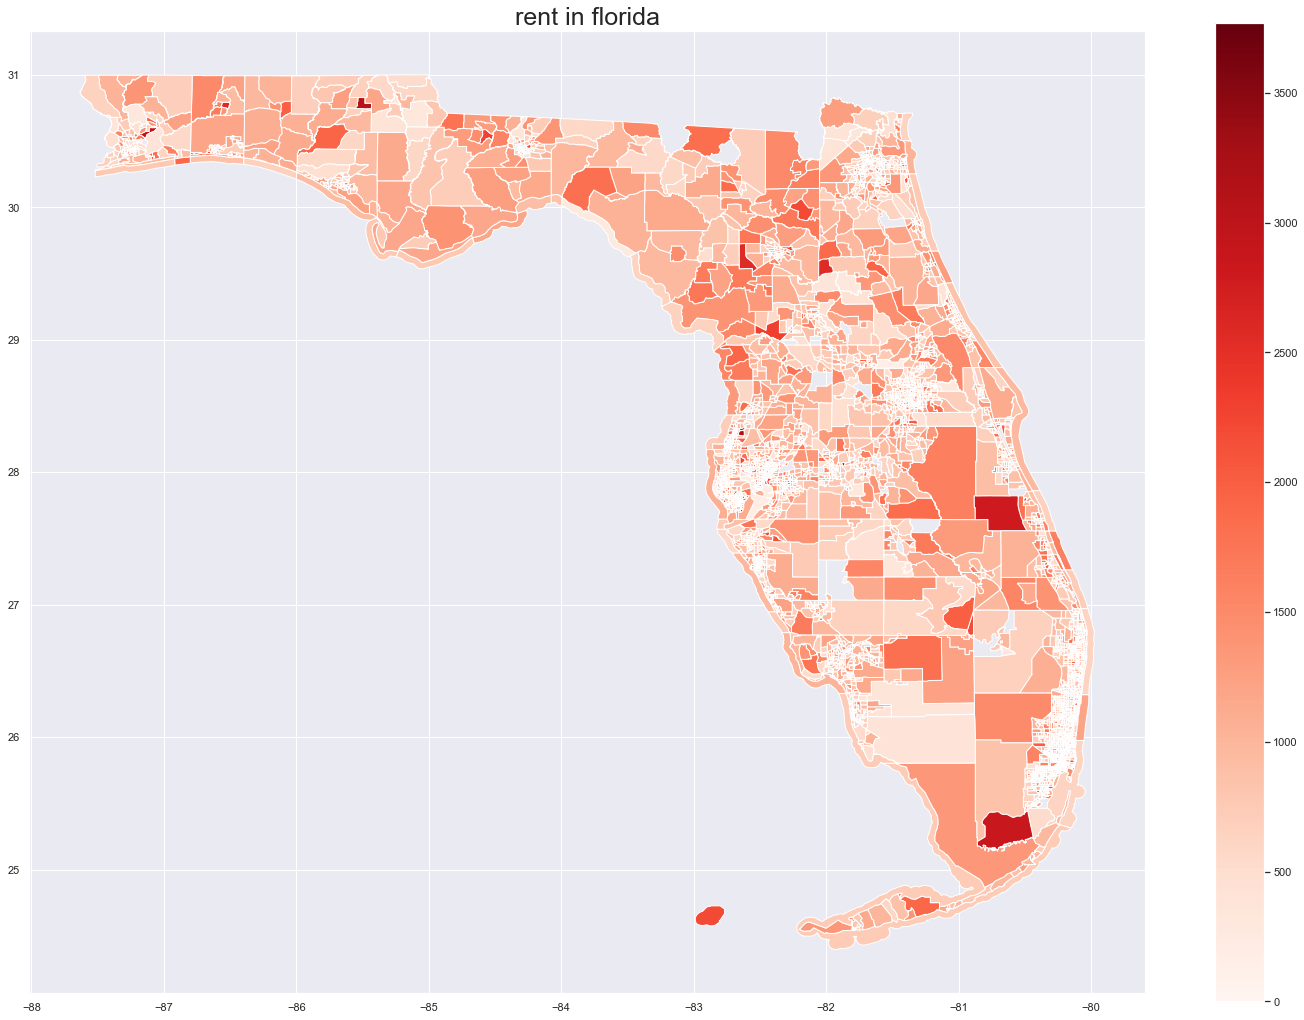

In [266]:
vmin, vmax = 730, 1250
fig, ax = plt.subplots(1, figsize=(25, 18))
ax.set_title('rent in florida', fontdict={'fontsize': '25', 'fontweight' : '3'})
state.plot(column='rent', cmap='Reds', ax=ax, legend=True)

In [267]:
fig.savefig('rent_map.png')

In [268]:
orange_county = geo.read_file('May2016Precinct_region.shp')

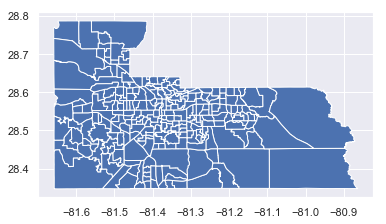

In [269]:
orange_county.plot()

In [270]:
orange = geo.overlay(state, orange_county, how='intersection')

C:\Users\mmart\Anaconda3\lib\site-packages\geopandas\base.py:29: UserWarning: GeoSeries crs mismatch: {} and {'init': 'epsg:4269'}
  other.crs))


,rent
count,1272.000000
mean,1006.321535
std,418.724286
min,150.000000
25%,739.877717
50%,895.658073
75%,1223.109244
max,2925.568182


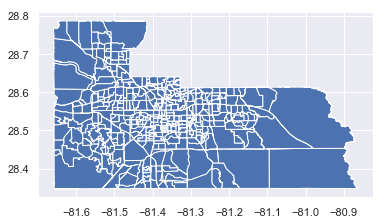

In [281]:
orange.plot()
orange.describe()

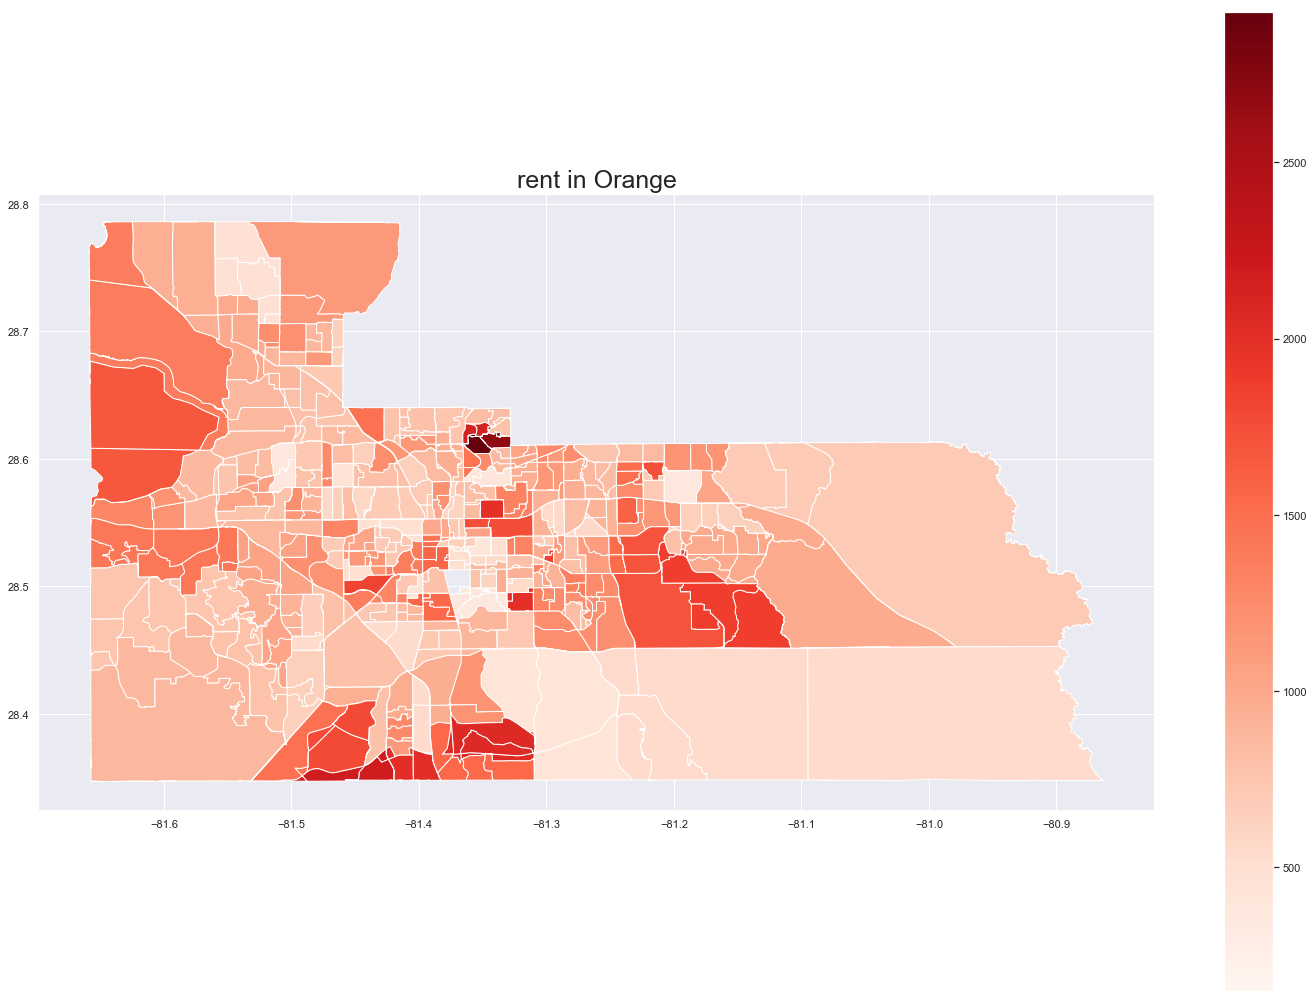

In [208]:
fig, ax = plt.subplots(1, figsize=(25, 18))
ax.set_title('rent in Orange', fontdict={'fontsize': '25', 'fontweight' : '3'})
orange.plot(column='rent', cmap='Reds', ax=ax, legend=True)

In [327]:
fig.savefig('orange_rent.png')

In [309]:
orlando = geo.read_file('Orlando_1128379_AL8.shp')

In [310]:
orlando.head(20)

,id,country,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,note,rpath,ISO3166_2,geometry
0,1128379,USA,Orlando,None,Orlando,None,administrative,8,Q49233,"en:Orlando, Florida",2019-02-21 20:37:21,None,"1128379,389011,162050,148838,0",None,"(POLYGON ((-81.5075377 28.522618, -81.50619349..."


In [311]:
orlando_rent = geo.overlay(state, orlando, how='intersection')

C:\Users\mmart\Anaconda3\lib\site-packages\geopandas\base.py:29: UserWarning: GeoSeries crs mismatch: {} and {'init': 'epsg:4326'}
  other.crs))


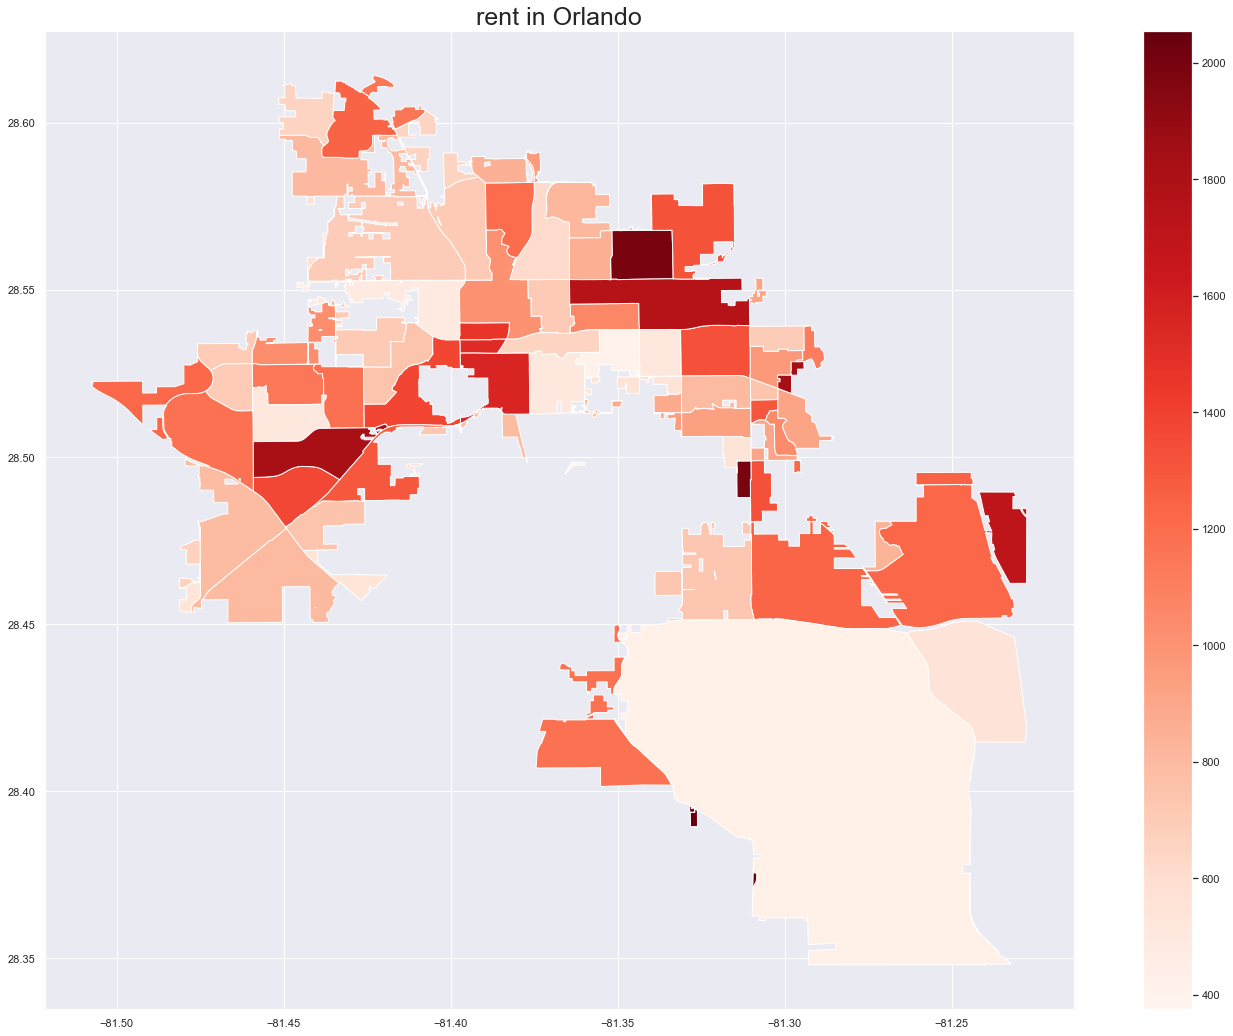

In [313]:
fig, ax = plt.subplots(1, figsize=(25, 18))
ax.set_title('rent in Orlando', fontdict={'fontsize': '25', 'fontweight' : '3'})
orlando_rent.plot(column='rent', cmap='Reds', ax=ax, legend=True)

In [314]:
fig.savefig('orland0_rent.png')

In [315]:
orlando_rent.describe()

,rent,id,adminlevel
count,89.000000,89.0,89.0
mean,969.622877,1128379.0,8.0
std,394.578194,0.0,0.0
min,375.288562,1128379.0,8.0
25%,701.582278,1128379.0,8.0
50%,875.396825,1128379.0,8.0
75%,1223.109244,1128379.0,8.0
max,2054.568528,1128379.0,8.0
